In [72]:
import os
from pathlib import Path
import sys
import os
import _pickle as pickle
import json
import copy 
import pandas
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
import csv
import json
from collections import Counter
import statistics 

# Time Taken

In [73]:
timeTaken = []
for root, dirs, files in os.walk("../clean"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    for i in range(1, len(dialogs)):
                        timeTaken.append(dialogs[i]['timeTaken'])
                    
                    
                except Exception as e: print(e)
                

In [74]:
print("Overall time taken in conversations: " + str(statistics.mean(timeTaken)))

Overall time taken in conversations: 24.218260661236226


In [75]:
Set1 = []
Set2 = []
Set3 = []
Set4 = []
Set5 = []

for root, dirs, files in os.walk("../clean"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    if(data['settingNumber'] == 1):
                        for i in range(1, len(dialogs)):
                            Set1.append(dialogs[i]['timeTaken'])
                    
                    elif(data['settingNumber'] == 2):
                        for i in range(1, len(dialogs)):
                            Set2.append(dialogs[i]['timeTaken'])
                    
                    elif(data['settingNumber'] == 3):
                        for i in range(1, len(dialogs)):
                            Set3.append(dialogs[i]['timeTaken'])
                        
                    elif(data['settingNumber'] == 4):
                        for i in range(1, len(dialogs)):
                            Set4.append(dialogs[i]['timeTaken'])
                    
                    else:
                        for i in range(1, len(dialogs)):
                            Set5.append(dialogs[i]['timeTaken'])
 
                    
                    
                except Exception as e: print(e)

In [76]:
print("Setting 1 time taken: " + str(statistics.mean(Set1)))
print("Setting 2 time taken: " + str(statistics.mean(Set2)))
print("Setting 3 time taken: " + str(statistics.mean(Set3)))
print("Setting 4 time taken: " + str(statistics.mean(Set4)))
print("Setting 5 time taken: " + str(statistics.mean(Set5)))

Setting 1 time taken: 31.2400525
Setting 2 time taken: 24.370452734638757
Setting 3 time taken: 21.830778250303766
Setting 4 time taken: 27.55907962264151
Setting 5 time taken: 20.457793987621574


## Setting 2

In [77]:
sugg1 = []
sugg3 = []
sugg5 = []

autoSugg1 = []
autoSugg3 = []
autoSugg5 = []


for root, dirs, files in os.walk("../clean/Setting 2"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    if(data['autoFilledSuggestion'] == 0):
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                sugg1.append(dialogs[i]['timeTaken'])
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                sugg3.append(dialogs[i]['timeTaken'])
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                sugg5.append(dialogs[i]['timeTaken'])
                    
                    else:
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                autoSugg1.append(dialogs[i]['timeTaken'])
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                autoSugg3.append(dialogs[i]['timeTaken'])
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                autoSugg5.append(dialogs[i]['timeTaken'])
                    
                    
                except Exception as e: print(e)

### Suggestions Only

In [78]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(sugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(sugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(sugg5)))

Finished conversations with 1 suggestion(s): 26.304049356223175
Finished conversations with 3 suggestion(s): 25.649731092436976
Finished conversations with 5 suggestion(s): 29.995435643564356


### Autofilled Suggestion

In [79]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(autoSugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(autoSugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(autoSugg5)))

Finished conversations with 1 suggestion(s): 19.93461724137931
Finished conversations with 3 suggestion(s): 23.421259842519685
Finished conversations with 5 suggestion(s): 22.99259090909091


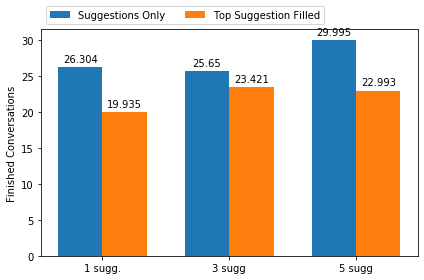

In [80]:
labels = ['1 sugg.', '3 sugg', '5 sugg']
suggMeans = [round(statistics.mean(sugg1), 3), round(statistics.mean(sugg3), 3), round(statistics.mean(sugg5), 3)]
sugFilledMeans = [round(statistics.mean(autoSugg1), 3), round(statistics.mean(autoSugg3), 3), round(statistics.mean(autoSugg5), 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, suggMeans, width, label='Suggestions Only')
rects2 = ax.bar(x + width/2, sugFilledMeans, width, label='Top Suggestion Filled')


ax.set_ylabel('Finished Conversations')
#ax.set_title('Finished Conversations in Setting 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Setting 3

In [81]:
sugg1 = []
sugg3 = []
sugg5 = []

autoSugg1 = []
autoSugg3 = []
autoSugg5 = []


for root, dirs, files in os.walk("../clean/Setting 3"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    if(data['autoFilledSuggestion'] == 0):
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                sugg1.append(dialogs[i]['timeTaken'])
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                sugg3.append(dialogs[i]['timeTaken'])
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                sugg5.append(dialogs[i]['timeTaken'])
                    
                    else:
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                autoSugg1.append(dialogs[i]['timeTaken'])
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                autoSugg3.append(dialogs[i]['timeTaken'])
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                autoSugg5.append(dialogs[i]['timeTaken'])
                    
                    
                except Exception as e: print(e)

### Suggestions Only

In [82]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(sugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(sugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(sugg5)))

Finished conversations with 1 suggestion(s): 24.53504183266932
Finished conversations with 3 suggestion(s): 20.573201376936318
Finished conversations with 5 suggestion(s): 27.973899082568806


### Autofilled Suggestion


In [83]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(autoSugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(autoSugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(autoSugg5)))

Finished conversations with 1 suggestion(s): 18.10536702954899
Finished conversations with 3 suggestion(s): 24.011894422310757
Finished conversations with 5 suggestion(s): 18.63846974522293


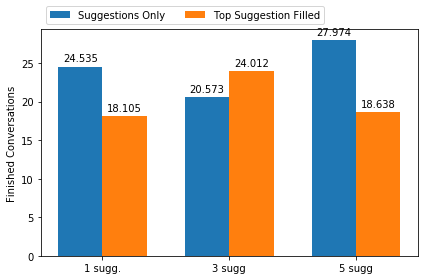

In [84]:
labels = ['1 sugg.', '3 sugg', '5 sugg']
suggMeans = [round(statistics.mean(sugg1), 3), round(statistics.mean(sugg3), 3), round(statistics.mean(sugg5), 3)]
sugFilledMeans = [round(statistics.mean(autoSugg1), 3), round(statistics.mean(autoSugg3), 3), round(statistics.mean(autoSugg5), 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, suggMeans, width, label='Suggestions Only')
rects2 = ax.bar(x + width/2, sugFilledMeans, width, label='Top Suggestion Filled')


ax.set_ylabel('Finished Conversations')
#ax.set_title('Finished Conversations in Setting 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Setting 4

In [85]:
sugg1 = []
sugg3 = []
sugg5 = []

autoSugg1 = []
autoSugg3 = []
autoSugg5 = []


for root, dirs, files in os.walk("../clean/Setting 4"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    if(data['autoFilledSuggestion'] == 0):
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                sugg1.append(dialogs[i]['timeTaken'])
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                sugg3.append(dialogs[i]['timeTaken'])
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                sugg5.append(dialogs[i]['timeTaken'])
                    
                    else:
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                autoSugg1.append(dialogs[i]['timeTaken'])
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                autoSugg3.append(dialogs[i]['timeTaken'])
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                autoSugg5.append(dialogs[i]['timeTaken'])
                    
                    
                except Exception as e: print(e)

### Suggestions Only

In [86]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(sugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(sugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(sugg5)))

Finished conversations with 1 suggestion(s): 28.016237986270024
Finished conversations with 3 suggestion(s): 32.35334366925065
Finished conversations with 5 suggestion(s): 34.82322752808989


### Autofilled Suggestion

In [87]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(autoSugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(autoSugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(autoSugg5)))

Finished conversations with 1 suggestion(s): 19.745777397260273
Finished conversations with 3 suggestion(s): 31.573556430446196
Finished conversations with 5 suggestion(s): 24.375431683168316


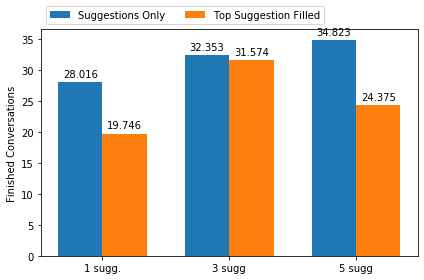

In [88]:
labels = ['1 sugg.', '3 sugg', '5 sugg']
suggMeans = [round(statistics.mean(sugg1), 3), round(statistics.mean(sugg3), 3), round(statistics.mean(sugg5), 3)]
sugFilledMeans = [round(statistics.mean(autoSugg1), 3), round(statistics.mean(autoSugg3), 3), round(statistics.mean(autoSugg5), 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, suggMeans, width, label='Suggestions Only')
rects2 = ax.bar(x + width/2, sugFilledMeans, width, label='Top Suggestion Filled')


ax.set_ylabel('Finished Conversations')
#ax.set_title('Finished Conversations in Setting 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Setting 5

In [89]:

sugg1 = []

autoSugg1 = []


for root, dirs, files in os.walk("../clean/Setting 5"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    
                    if(data['autoFilledSuggestion'] == 0):
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                sugg1.append(dialogs[i]['timeTaken'])
                        
                       
                    else:
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                autoSugg1.append(dialogs[i]['timeTaken'])
                    
                    
                except Exception as e: print(e)



### Suggestions Only

In [90]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(sugg1)))


Finished conversations with 1 suggestion(s): 22.280836575875487


### Autofilled Suggestion

In [91]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(autoSugg1)))


Finished conversations with 1 suggestion(s): 18.939084278768235


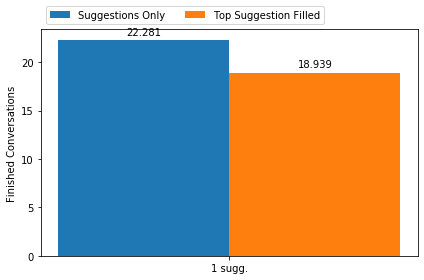

In [92]:
labels = ['1 sugg.']
suggMeans = [round(statistics.mean(sugg1), 3)]
sugFilledMeans = [round(statistics.mean(autoSugg1), 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, suggMeans, width, label='Suggestions Only')
rects2 = ax.bar(x + width/2, sugFilledMeans, width, label='Top Suggestion Filled')


ax.set_ylabel('Finished Conversations')
#ax.set_title('Finished Conversations in Setting 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()